In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
import ast

In [5]:
df = df.dropna(subset='salary_year_avg').copy()

In [6]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_exp = df.explode('job_skills')
df_exp = df_exp[(df_exp['job_country']=='United States') & (df_exp['job_title_short']=='Data Analyst')]

**Highest Paying And Most In Demand Skills**

In [8]:
from matplotlib import pyplot as plt

In [18]:
df_top_pay = df_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

In [32]:
df_most_demand_index = df_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).index
df_most_demand = df_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).loc[df_most_demand_index].sort_values(by='median',ascending=False)


In [13]:
from matplotlib import ticker as mtick

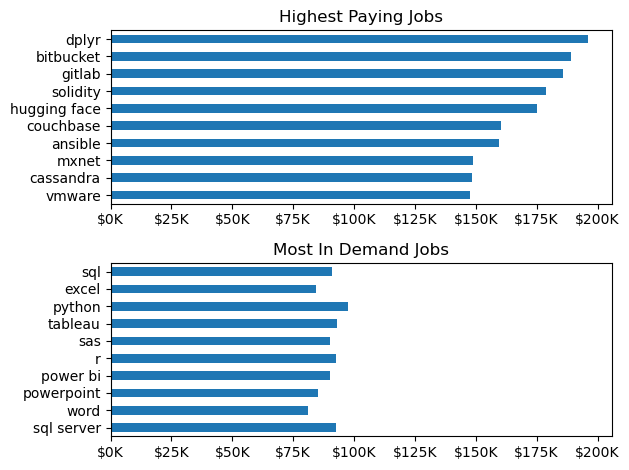

In [ ]:
# fig , ax = plt.subplots(2,1)
# df_top_pay.loc[:,'median'].plot(kind='barh',ax=ax[0]).invert_yaxis()
# ax[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
# ax[0].set_title('Highest Paying Jobs')
# ax[0].set_xlabel('')
# ax[0].set_ylabel('')



# df_most_demand.loc[:,'median'].plot(kind='barh',ax=ax[1]).invert_yaxis()
# ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
# ax[1].set_title('Most In Demand Jobs')
# ax[1].set_xlabel('')
# ax[1].set_ylabel('')


# ax[1].set_xlim(ax[0].get_xlim())
# fig.tight_layout()


In [14]:
import seaborn as sns

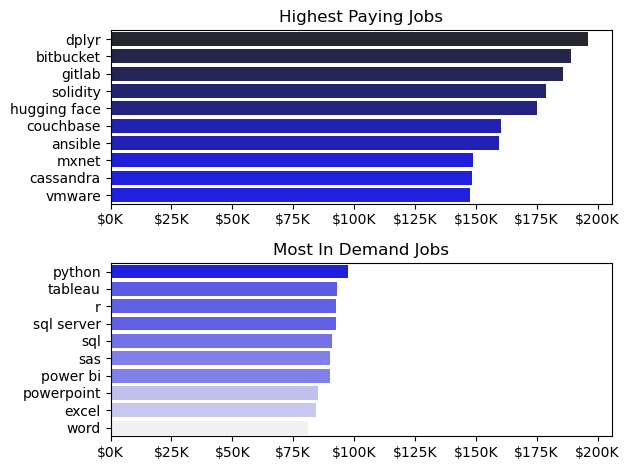

In [35]:
fig , ax = plt.subplots(2,1)
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette= 'dark:b_r', legend=False)
#df_top_pay.loc[:,'median'].plot(kind='barh',ax=ax[0]).invert_yaxis()
ax[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
ax[0].set_title('Highest Paying Jobs')
ax[0].set_xlabel('')
ax[0].set_ylabel('')


sns.barplot(data=df_most_demand, x='median', y=df_most_demand.index, ax=ax[1], hue='median', palette= 'light:b', legend=False)
#df_most_demand.loc[:,'median'].plot(kind='barh',ax=ax[1]).invert_yaxis()
ax[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
ax[1].set_title('Most In Demand Jobs')
ax[1].set_xlabel('')
ax[1].set_ylabel('')


ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()
